# Keras Classification

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [76]:
# from google.colab import drive
# drive.mount('/content/drive')

In [77]:
from sklearn.datasets import load_breast_cancer

In [78]:
cancer = load_breast_cancer()

In [79]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [80]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [81]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [82]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,...,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,...,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,...,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,...,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [83]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [84]:
frames = [df_feat, df_target]
df = pd.concat(frames,axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,...,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [85]:
df.shape

(569, 31)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [88]:
df.Cancer.value_counts()

1    357
0    212
Name: Cancer, dtype: int64

<AxesSubplot:xlabel='Cancer', ylabel='count'>

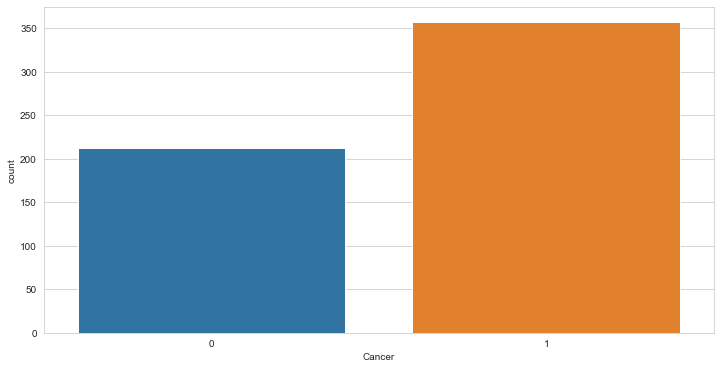

In [89]:
sns.countplot(df["Cancer"])

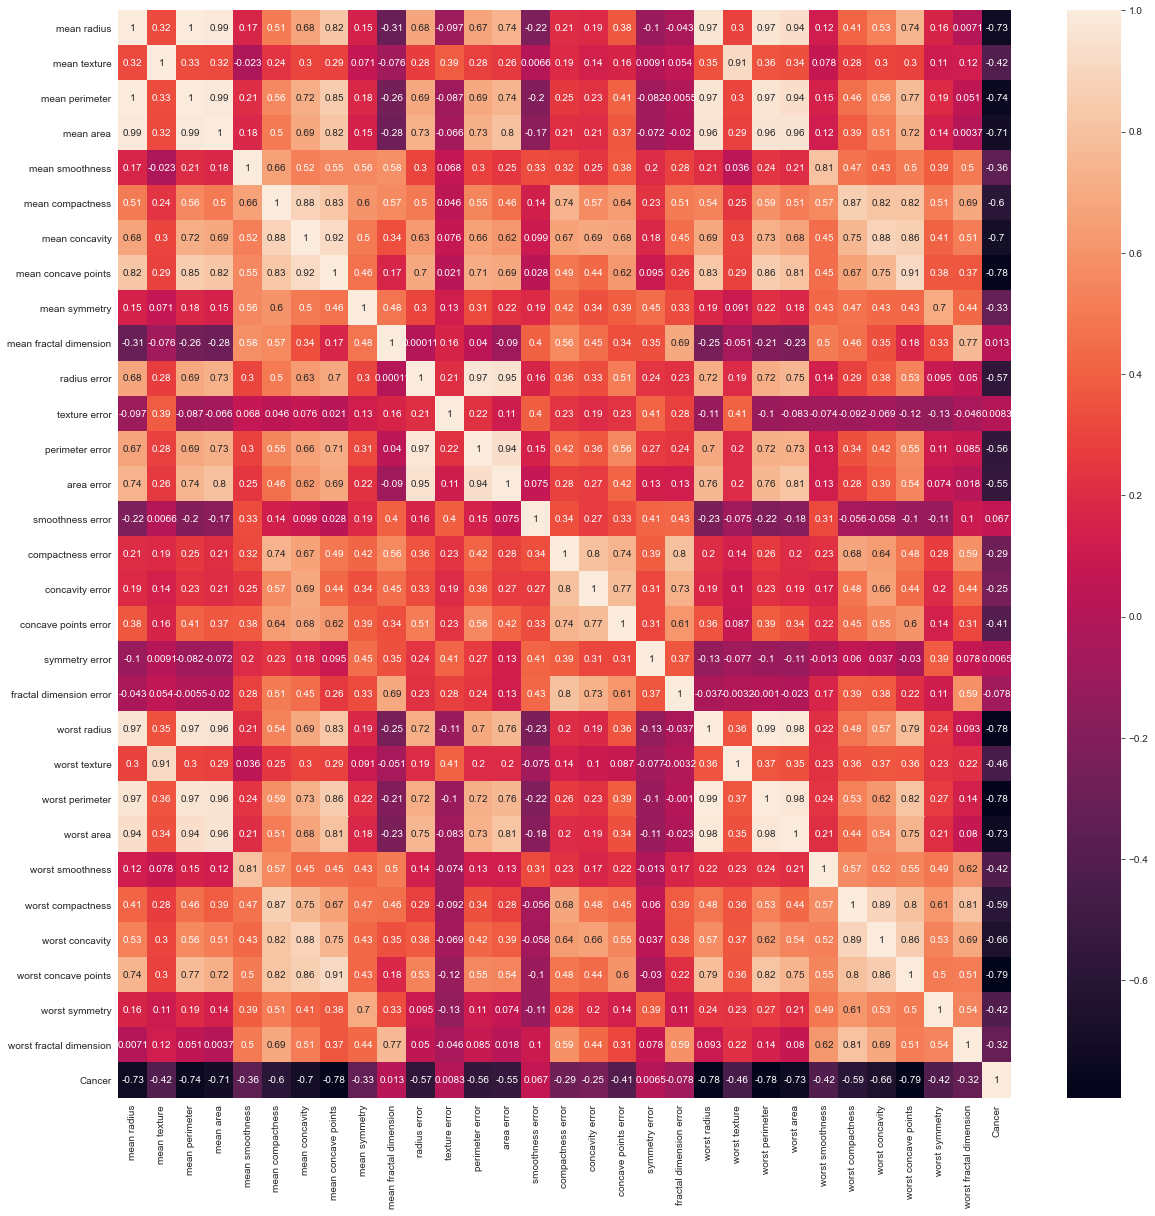

In [91]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [92]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

In [93]:
df=df.drop(drop_list, axis=1)

In [95]:
df.shape

(569, 25)

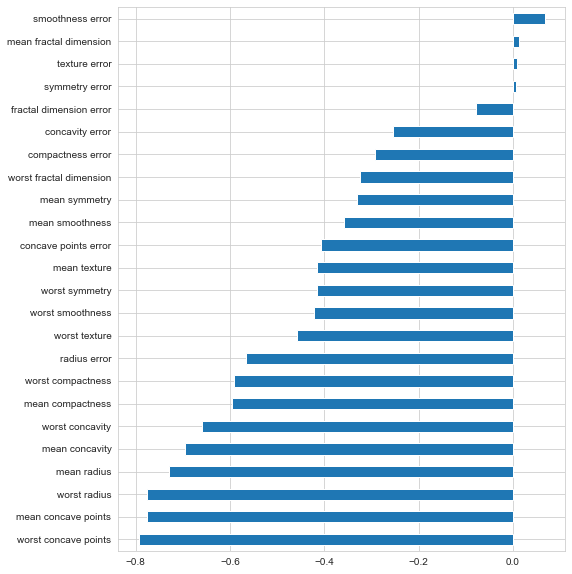

In [97]:
plt.figure(figsize = (8,10))
df.corr()['Cancer'].sort_values().drop("Cancer").plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [105]:
X = df.drop('Cancer', axis=1)
y = df['Cancer'].values

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [107]:
scaler = MinMaxScaler()

In [108]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [110]:
X_train.shape

(512, 24)

In [111]:
X_test.shape

(57, 24)

In [112]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [114]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.3644e-04 - accuracy: 1.0000 - val_loss: 0.0405 - val_accuracy: 0.9808
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3618e-04 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9808
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3718e-04 - accuracy: 1.0000 - val_loss: 0.0418 - val_accuracy: 0.9808
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3767e-04 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 0.9808
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.4290e-04 - accuracy: 1.0000 - val_loss: 0.0402 - val_accuracy: 0.9808
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.5132e-04 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9808
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3660e-04 - accuracy: 1.0000 - val_loss: 0.0479 -

Epoch 57/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.0894e-04 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 0.9808
Epoch 58/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.0226e-04 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9808
Epoch 59/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.0478e-04 - accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 0.9808
Epoch 60/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.1173e-04 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9808
Epoch 61/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.0078e-04 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9808
Epoch 62/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.1440e-04 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9808
Epoch 63/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.0571e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 113/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9870 - val_loss: 0.0564 - val_accuracy: 0.9808
Epoch 114/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9870 - val_loss: 0.0815 - val_accuracy: 0.9808
Epoch 115/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9957 - val_loss: 0.0198 - val_accuracy: 0.9808
Epoch 116/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 117/1000
15/15 [==============================] - 0s 2ms/step - loss: 2.7434e-04 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9808
Epoch 118/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.0633e-04 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9808
Epoch 119/1000
15/15 [==============================] - 0s 2ms/step - loss: 2.8295e-04 - accuracy: 1.0000 - val_loss: 0.0151 - v

15/15 [==============================] - 0s 1ms/step - loss: 1.3483e-04 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 0.9808
Epoch 169/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3429e-04 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9808
Epoch 170/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3275e-04 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9808
Epoch 171/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3112e-04 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 0.9808
Epoch 172/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3059e-04 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9808
Epoch 173/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3059e-04 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9808
Epoch 174/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3006e-04 - accuracy: 1.0000 - val_loss: 0.0194 - 

15/15 [==============================] - 0s 2ms/step - loss: 9.9736e-05 - accuracy: 1.0000 - val_loss: 0.0285 - val_accuracy: 0.9808
Epoch 224/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.0045e-04 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9808
Epoch 225/1000
15/15 [==============================] - 0s 2ms/step - loss: 9.9836e-05 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9808
Epoch 226/1000
15/15 [==============================] - 0s 2ms/step - loss: 9.8891e-05 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9808
Epoch 227/1000
15/15 [==============================] - 0s 2ms/step - loss: 9.7940e-05 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 0.9808
Epoch 228/1000
15/15 [==============================] - 0s 2ms/step - loss: 9.7604e-05 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 0.9808
Epoch 229/1000
15/15 [==============================] - 0s 2ms/step - loss: 9.7638e-05 - accuracy: 1.0000 - val_loss: 0.0284 - 

15/15 [==============================] - 0s 2ms/step - loss: 8.2331e-05 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9808
Epoch 279/1000
15/15 [==============================] - 0s 1ms/step - loss: 8.1817e-05 - accuracy: 1.0000 - val_loss: 0.0359 - val_accuracy: 0.9808
Epoch 280/1000
15/15 [==============================] - 0s 2ms/step - loss: 8.0165e-05 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9808
Epoch 281/1000
15/15 [==============================] - 0s 2ms/step - loss: 8.3069e-05 - accuracy: 1.0000 - val_loss: 0.0381 - val_accuracy: 0.9808
Epoch 282/1000
15/15 [==============================] - 0s 2ms/step - loss: 8.0036e-05 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 0.9808
Epoch 283/1000
15/15 [==============================] - 0s 2ms/step - loss: 8.2681e-05 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9808
Epoch 284/1000
15/15 [==============================] - 0s 2ms/step - loss: 8.0294e-05 - accuracy: 1.0000 - val_loss: 0.0366 - 

15/15 [==============================] - 0s 2ms/step - loss: 6.7569e-05 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9808
Epoch 334/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.8811e-05 - accuracy: 1.0000 - val_loss: 0.0424 - val_accuracy: 0.9808
Epoch 335/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.9609e-05 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9808
Epoch 336/1000
15/15 [==============================] - 0s 2ms/step - loss: 6.7913e-05 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 0.9808
Epoch 337/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.7966e-05 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9808
Epoch 338/1000
15/15 [==============================] - 0s 2ms/step - loss: 6.8023e-05 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 0.9808
Epoch 339/1000
15/15 [==============================] - 0s 2ms/step - loss: 6.8557e-05 - accuracy: 1.0000 - val_loss: 0.0429 - 

15/15 [==============================] - 0s 2ms/step - loss: 5.9560e-05 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0.9808
Epoch 389/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.9159e-05 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9808
Epoch 390/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.8582e-05 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9808
Epoch 391/1000
15/15 [==============================] - 0s 2ms/step - loss: 6.0714e-05 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9808
Epoch 392/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9685e-05 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9808
Epoch 393/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.0036e-05 - accuracy: 1.0000 - val_loss: 0.0485 - val_accuracy: 0.9808
Epoch 394/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.8564e-05 - accuracy: 1.0000 - val_loss: 0.0496 - 

15/15 [==============================] - 0s 2ms/step - loss: 5.1081e-05 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9808
Epoch 444/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.0300e-05 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 0.9808
Epoch 445/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.0263e-05 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9808
Epoch 446/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.9590e-05 - accuracy: 1.0000 - val_loss: 0.0518 - val_accuracy: 0.9808
Epoch 447/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.0879e-05 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9808
Epoch 448/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.9846e-05 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9808
Epoch 449/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.1289e-05 - accuracy: 1.0000 - val_loss: 0.0527 - 

15/15 [==============================] - 0s 2ms/step - loss: 4.2891e-05 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9808
Epoch 499/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.4002e-05 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 0.9808
Epoch 500/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.2549e-05 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 0.9808
Epoch 501/1000
15/15 [==============================] - 0s 1ms/step - loss: 4.1250e-05 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9808
Epoch 502/1000
15/15 [==============================] - 0s 1ms/step - loss: 4.1505e-05 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 0.9808
Epoch 503/1000
15/15 [==============================] - 0s 1ms/step - loss: 4.0266e-05 - accuracy: 1.0000 - val_loss: 0.0548 - val_accuracy: 0.9808
Epoch 504/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.0071e-05 - accuracy: 1.0000 - val_loss: 0.0554 - 

15/15 [==============================] - 0s 2ms/step - loss: 9.2838e-05 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9808
Epoch 554/1000
15/15 [==============================] - 0s 2ms/step - loss: 8.9148e-05 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9808
Epoch 555/1000
15/15 [==============================] - 0s 2ms/step - loss: 8.5034e-05 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9808
Epoch 556/1000
15/15 [==============================] - 0s 1ms/step - loss: 8.2429e-05 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9808
Epoch 557/1000
15/15 [==============================] - 0s 1ms/step - loss: 7.9090e-05 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 558/1000
15/15 [==============================] - 0s 2ms/step - loss: 7.7093e-05 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 559/1000
15/15 [==============================] - 0s 1ms/step - loss: 7.5320e-05 - accuracy: 1.0000 - val_loss: 0.0134 - 

15/15 [==============================] - 0s 2ms/step - loss: 4.3981e-05 - accuracy: 1.0000 - val_loss: 0.0166 - val_accuracy: 0.9808
Epoch 609/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.4576e-05 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 0.9808
Epoch 610/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.3597e-05 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9808
Epoch 611/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.3331e-05 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9808
Epoch 612/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.3405e-05 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 0.9808
Epoch 613/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.2893e-05 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9808
Epoch 614/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.2727e-05 - accuracy: 1.0000 - val_loss: 0.0173 - 

15/15 [==============================] - 0s 1ms/step - loss: 3.6777e-05 - accuracy: 1.0000 - val_loss: 0.0214 - val_accuracy: 0.9808
Epoch 664/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.7032e-05 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9808
Epoch 665/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.6764e-05 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9808
Epoch 666/1000
15/15 [==============================] - 0s 1ms/step - loss: 3.6109e-05 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 0.9808
Epoch 667/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.6167e-05 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.9808
Epoch 668/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.6423e-05 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9808
Epoch 669/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.5824e-05 - accuracy: 1.0000 - val_loss: 0.0214 - 

15/15 [==============================] - 0s 2ms/step - loss: 3.2152e-05 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 0.9808
Epoch 719/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.2150e-05 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9808
Epoch 720/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.1978e-05 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.9808
Epoch 721/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.1800e-05 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.9808
Epoch 722/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.1661e-05 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 0.9808
Epoch 723/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.1940e-05 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 0.9808
Epoch 724/1000
15/15 [==============================] - 0s 1ms/step - loss: 3.1506e-05 - accuracy: 1.0000 - val_loss: 0.0278 - 

15/15 [==============================] - 0s 2ms/step - loss: 2.8051e-05 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 0.9808
Epoch 774/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.7787e-05 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 0.9808
Epoch 775/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.7648e-05 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 0.9808
Epoch 776/1000
15/15 [==============================] - 0s 2ms/step - loss: 2.7635e-05 - accuracy: 1.0000 - val_loss: 0.0332 - val_accuracy: 0.9808
Epoch 777/1000
15/15 [==============================] - 0s 2ms/step - loss: 2.7596e-05 - accuracy: 1.0000 - val_loss: 0.0342 - val_accuracy: 0.9808
Epoch 778/1000
15/15 [==============================] - 0s 2ms/step - loss: 2.8163e-05 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 0.9808
Epoch 779/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.7813e-05 - accuracy: 1.0000 - val_loss: 0.0336 - 

15/15 [==============================] - 0s 1ms/step - loss: 2.4584e-05 - accuracy: 1.0000 - val_loss: 0.0361 - val_accuracy: 0.9808
Epoch 829/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.4366e-05 - accuracy: 1.0000 - val_loss: 0.0383 - val_accuracy: 0.9808
Epoch 830/1000
15/15 [==============================] - 0s 2ms/step - loss: 2.3771e-05 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9808
Epoch 831/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.4198e-05 - accuracy: 1.0000 - val_loss: 0.0399 - val_accuracy: 0.9808
Epoch 832/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.3718e-05 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 0.9808
Epoch 833/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.4169e-05 - accuracy: 1.0000 - val_loss: 0.0403 - val_accuracy: 0.9808
Epoch 834/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.4131e-05 - accuracy: 1.0000 - val_loss: 0.0378 - 

15/15 [==============================] - 0s 2ms/step - loss: 2.0340e-05 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9808
Epoch 884/1000
15/15 [==============================] - 0s 2ms/step - loss: 2.0800e-05 - accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 0.9808
Epoch 885/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.0192e-05 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9808
Epoch 886/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.0014e-05 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 0.9808
Epoch 887/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.0426e-05 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9808
Epoch 888/1000
15/15 [==============================] - 0s 2ms/step - loss: 2.0353e-05 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9808
Epoch 889/1000
15/15 [==============================] - 0s 1ms/step - loss: 2.1108e-05 - accuracy: 1.0000 - val_loss: 0.0471 - 

15/15 [==============================] - 0s 1ms/step - loss: 1.6205e-05 - accuracy: 1.0000 - val_loss: 0.0527 - val_accuracy: 0.9808
Epoch 939/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.7206e-05 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9808
Epoch 940/1000
15/15 [==============================] - 0s 1ms/step - loss: 1.6387e-05 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9808
Epoch 941/1000
15/15 [==============================] - 0s 1ms/step - loss: 1.6961e-05 - accuracy: 1.0000 - val_loss: 0.0530 - val_accuracy: 0.9808
Epoch 942/1000
15/15 [==============================] - 0s 1ms/step - loss: 1.7807e-05 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 0.9808
Epoch 943/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.8723e-05 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9808
Epoch 944/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.8135e-05 - accuracy: 1.0000 - val_loss: 0.0499 - 

15/15 [==============================] - 0s 1ms/step - loss: 1.7076e-05 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 0.9808
Epoch 994/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.8141e-05 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9808
Epoch 995/1000
15/15 [==============================] - 0s 1ms/step - loss: 1.3142e-05 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9808
Epoch 996/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.2968e-05 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9808
Epoch 997/1000
15/15 [==============================] - 0s 1ms/step - loss: 1.2754e-05 - accuracy: 1.0000 - val_loss: 0.0576 - val_accuracy: 0.9808
Epoch 998/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.2897e-05 - accuracy: 1.0000 - val_loss: 0.0566 - val_accuracy: 0.9808
Epoch 999/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.2977e-05 - accuracy: 1.0000 - val_loss: 0.0567 - 

In [115]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                750       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [117]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.000,1.000,0.041,0.981
1,0.000,1.000,0.042,0.981
2,0.000,1.000,0.042,0.981
3,0.000,1.000,0.043,0.981
4,0.000,1.000,0.040,0.981


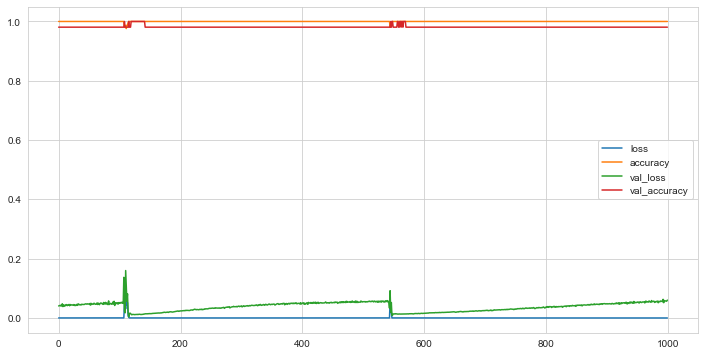

In [118]:
loss_df.plot();

In [44]:
model.evaluate(X_test, y_test, verbose=0)

[0.5395236015319824, 0.859649121761322]

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5395236015319824
accuracy :  0.859649121761322


In [119]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.97      0.89      0.93        36

    accuracy                           0.91        57
   macro avg       0.90      0.92      0.91        57
weighted avg       0.92      0.91      0.91        57



### EarlyStopping

In [120]:
from tensorflow.keras.callbacks import EarlyStopping

In [121]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [122]:
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

In [123]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [124]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6869 - accuracy: 0.6435 - val_loss: 0.6714 - val_accuracy: 0.8077
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.8022 - val_loss: 0.6369 - val_accuracy: 0.9038
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.8174 - val_loss: 0.5886 - val_accuracy: 0.9231
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.8565 - val_loss: 0.5430 - val_accuracy: 0.8269
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.8609 - val_loss: 0.4820 - val_accuracy: 0.8462
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8717 - val_loss: 0.4219 - val_accuracy: 0.8846
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8739 - val_loss: 0.3640 - val_accuracy: 0.9038
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9848 - val_loss: 0.0452 - val_accuracy: 0.9808
Epoch 59/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9870 - val_loss: 0.0465 - val_accuracy: 0.9615
Epoch 60/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9870 - val_loss: 0.0439 - val_accuracy: 0.9808
Epoch 61/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9870 - val_loss: 0.0469 - val_accuracy: 0.9615
Epoch 62/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9848 - val_loss: 0.0436 - val_accuracy: 0.9808
Epoch 63/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9891 - val_loss: 0.0482 - val_accuracy: 0.9615
Epoch 64/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9870 - val_loss: 0.0459 - val_accuracy: 0.9615
Epoch 65/1000

15/15 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9870 - val_loss: 0.0306 - val_accuracy: 0.9808
Epoch 116/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9891 - val_loss: 0.0382 - val_accuracy: 0.9808
Epoch 117/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9870 - val_loss: 0.0293 - val_accuracy: 0.9808
Epoch 118/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9891 - val_loss: 0.0397 - val_accuracy: 0.9808
Epoch 119/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0303 - val_accuracy: 0.9808
Epoch 120/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9891 - val_loss: 0.0327 - val_accuracy: 0.9808
Epoch 121/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9870 - val_loss: 0.0375 - val_accuracy: 0.9808
Epoch 1

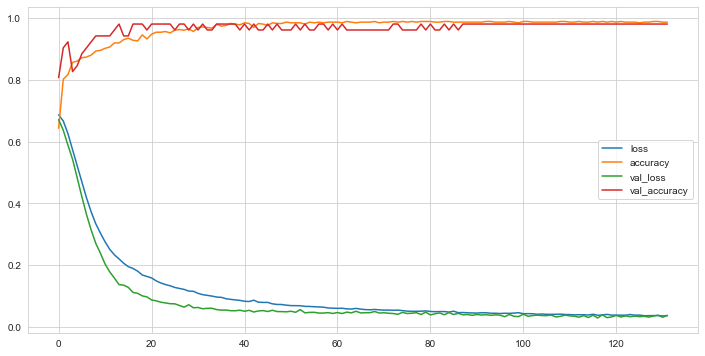

In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [126]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



### learning_rate

In [127]:
from tensorflow.keras.optimizers import Adam

In [128]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [129]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [131]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 0.9891 - val_loss: 0.0319 - val_accuracy: 0.9808
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9913 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9913 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9891 - val_loss: 0.0242 - val_accuracy: 0.9808
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9891 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9891 - val_loss: 0.0348 - val_accuracy: 0.9808
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9891 - val_loss: 0.0605 - val_accuracy: 0.9808
Epoch 

<AxesSubplot:>

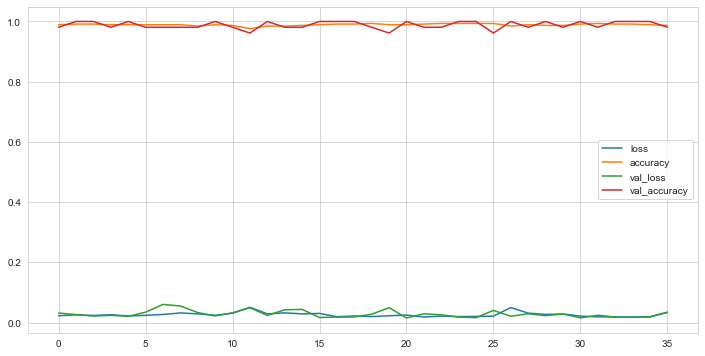

In [133]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [134]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      1.00      0.97        36

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [135]:
from tensorflow.keras.layers import Dropout

In [136]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [137]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6995 - accuracy: 0.4565 - val_loss: 0.6962 - val_accuracy: 0.4038
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5043 - val_loss: 0.6829 - val_accuracy: 0.6923
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5652 - val_loss: 0.6715 - val_accuracy: 0.7500
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6457 - val_loss: 0.6620 - val_accuracy: 0.6731
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6848 - val_loss: 0.6473 - val_accuracy: 0.6923
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.6957 - val_loss: 0.6320 - val_accuracy: 0.7115
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7217 - val_loss: 0.6142 - val_accuracy: 0.7115
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9326 - val_loss: 0.0498 - val_accuracy: 0.9808
Epoch 59/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.9587 - val_loss: 0.0499 - val_accuracy: 0.9808
Epoch 60/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9565 - val_loss: 0.0539 - val_accuracy: 0.9615
Epoch 61/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9630 - val_loss: 0.0461 - val_accuracy: 0.9808
Epoch 62/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9543 - val_loss: 0.0578 - val_accuracy: 0.9615
Epoch 63/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1434 - accuracy: 0.9587 - val_loss: 0.0600 - val_accuracy: 0.9615
Epoch 64/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9435 - val_loss: 0.0550 - val_accuracy: 0.9808
Epoch 65/1000

15/15 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9761 - val_loss: 0.0280 - val_accuracy: 0.9808
Epoch 116/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9587 - val_loss: 0.0298 - val_accuracy: 0.9808
Epoch 117/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.9696 - val_loss: 0.0365 - val_accuracy: 0.9808
Epoch 118/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.9761 - val_loss: 0.0353 - val_accuracy: 0.9808
Epoch 119/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9739 - val_loss: 0.0337 - val_accuracy: 0.9808
Epoch 120/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.9783 - val_loss: 0.0444 - val_accuracy: 0.9615
Epoch 121/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9674 - val_loss: 0.0362 - val_accuracy: 0.9808
Epoch 1

Epoch 172/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9652 - val_loss: 0.0247 - val_accuracy: 0.9808
Epoch 173/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9674 - val_loss: 0.0426 - val_accuracy: 0.9615
Epoch 174/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9804 - val_loss: 0.0311 - val_accuracy: 0.9808
Epoch 175/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9739 - val_loss: 0.0374 - val_accuracy: 0.9808
Epoch 176/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9870 - val_loss: 0.0323 - val_accuracy: 0.9808
Epoch 177/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9761 - val_loss: 0.0288 - val_accuracy: 0.9808
Epoch 178/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9739 - val_loss: 0.0321 - val_accuracy:

Epoch 229/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9804 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 230/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9826 - val_loss: 0.0288 - val_accuracy: 0.9808
Epoch 231/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9804 - val_loss: 0.0388 - val_accuracy: 0.9808
Epoch 232/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9826 - val_loss: 0.0203 - val_accuracy: 0.9808
Epoch 233/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9783 - val_loss: 0.0281 - val_accuracy: 0.9808
Epoch 234/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9783 - val_loss: 0.0292 - val_accuracy: 0.9808
Epoch 235/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9804 - val_loss: 0.0521 - val_accuracy:

Epoch 286/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9848 - val_loss: 0.0243 - val_accuracy: 0.9808
Epoch 287/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.9717 - val_loss: 0.0282 - val_accuracy: 0.9808
Epoch 288/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9826 - val_loss: 0.0386 - val_accuracy: 0.9808
Epoch 289/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9913 - val_loss: 0.0315 - val_accuracy: 0.9808
Epoch 290/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9870 - val_loss: 0.0208 - val_accuracy: 0.9808
Epoch 291/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 292/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9891 - val_loss: 0.0206 - val_accuracy:

Epoch 343/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9870 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 344/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9826 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 345/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9913 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 346/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 0.9848 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 347/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9804 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 348/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9870 - val_loss: 0.0238 - val_accuracy: 0.9808
Epoch 349/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9804 - val_loss: 0.0227 - val_accuracy:

Epoch 400/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9870 - val_loss: 0.0229 - val_accuracy: 0.9808
Epoch 401/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9826 - val_loss: 0.0261 - val_accuracy: 0.9808
Epoch 402/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9826 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 403/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 404/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9848 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 405/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9913 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 406/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9739 - val_loss: 0.0241 - val_accuracy:

Epoch 457/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9848 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 458/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9848 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 459/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 460/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9848 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 461/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9826 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 462/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9804 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 463/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9804 - val_loss: 0.0148 - val_accuracy:

Epoch 514/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9870 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 515/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9870 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 516/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9870 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 517/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9848 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 518/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 519/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9848 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 520/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9913 - val_loss: 0.0118 - val_accuracy:

Epoch 571/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9891 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 572/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9804 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 573/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9848 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 574/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9913 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 575/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9848 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 576/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9804 - val_loss: 0.0184 - val_accuracy: 0.9808
Epoch 577/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9826 - val_loss: 0.0150 - val_accuracy:

Epoch 628/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 629/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 630/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9826 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 631/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9804 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 632/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9913 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 633/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9891 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 634/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9957 - val_loss: 0.0072 - val_accuracy:

Epoch 685/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 686/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9826 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 687/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9891 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 688/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9848 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 689/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9826 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 690/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9891 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 691/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9913 - val_loss: 0.0082 - val_accuracy:

Epoch 742/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9957 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 743/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9913 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 744/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9913 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 745/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 746/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 747/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 8.4570e-04 - val_accuracy: 1.0000
Epoch 748/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9957 - val_loss: 9.4380e-04 - val_a

Epoch 799/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9913 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 800/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9913 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 801/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9891 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 802/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9913 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 803/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9935 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 804/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9891 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 805/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9957 - val_loss: 0.0024 - val_accuracy:

Epoch 856/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9913 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 857/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9891 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 858/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9935 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 859/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9913 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 860/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9913 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 861/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9978 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 862/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9913 - val_loss: 0.0042 - val_accuracy:

Epoch 913/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9913 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 914/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 915/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9913 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 916/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9957 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 917/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9870 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 918/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9891 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 919/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9870 - val_loss: 0.0025 - val_accuracy:

Epoch 970/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9826 - val_loss: 7.0011e-04 - val_accuracy: 1.0000
Epoch 971/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9848 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 972/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9913 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 973/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9913 - val_loss: 7.8907e-04 - val_accuracy: 1.0000
Epoch 974/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 9.4874e-04 - val_accuracy: 1.0000
Epoch 975/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 976/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9870 - val_loss: 0.0069 - v

<AxesSubplot:>

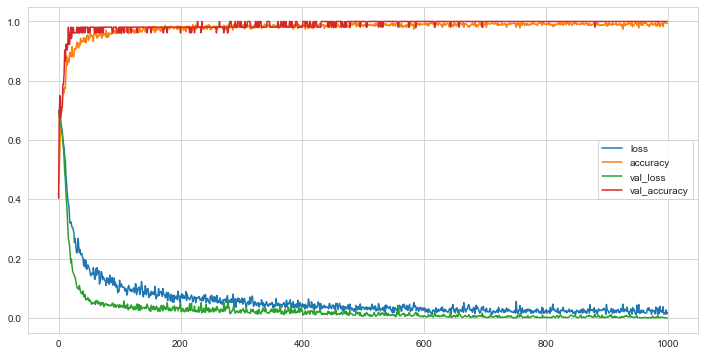

In [138]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [139]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



## Cross Validation

In [143]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [144]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [145]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

scores = cross_validate(estimator = classifier, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.971,0.031
pre,0.973,0.037
rec,0.982,0.021
f1,0.977,0.023


## GridSearchCV

In [146]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [147]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 15)

In [148]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/200
16/16 [==============================] - 0s 731us/step - loss: 0.6876 - accuracy: 0.5801
Epoch 2/200
16/16 [==============================] - 0s 664us/step - loss: 0.6551 - accuracy: 0.8066
Epoch 3/200
16/16 [==============================] - 0s 598us/step - loss: 0.6159 - accuracy: 0.8594
Epoch 4/200
16/16 [==============================] - 0s 665us/step - loss: 0.5686 - accuracy: 0.8828
Epoch 5/200
16/16 [==============================] - 0s 665us/step - loss: 0.5035 - accuracy: 0.8926
Epoch 6/200
16/16 [==============================] - 0s 665us/step - loss: 0.4342 - accuracy: 0.9180
Epoch 7/200
16/16 [==============================] - 0s 532us/step - loss: 0.3676 - accuracy: 0.9258
Epoch 8/200
16/16 [==============================] - 0s 598us/step - loss: 0.3131 - accuracy: 0.9277
Epoch 9/200
16/16 [==============================] - 0s 665us/step - loss: 0.2713 - accuracy: 0.9395
Epoch 10/200
16/16 [========

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000281E96ED970>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'SGD', 'adagrad',
                                       'adadelta']},
             scoring='accuracy', verbose=1)

In [162]:
grid_model.best_score_

0.9765460030165913

In [163]:
grid_model.best_params_

{'batch_size': 32, 'optimizer': 'adam'}

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

#### for keras models

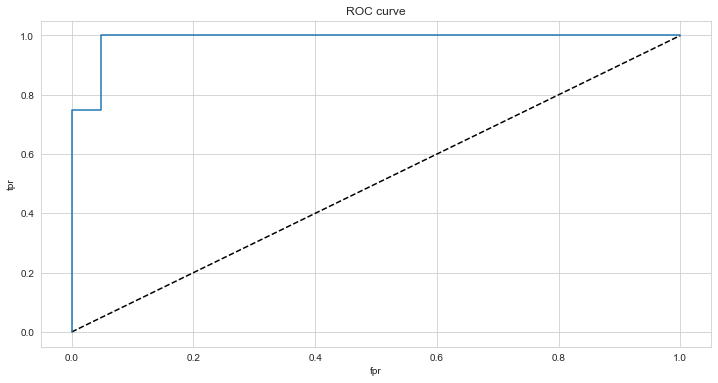

In [164]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [165]:
roc_auc_score(y_test, y_pred_proba)

0.988095238095238

#### for gridsearchcv model

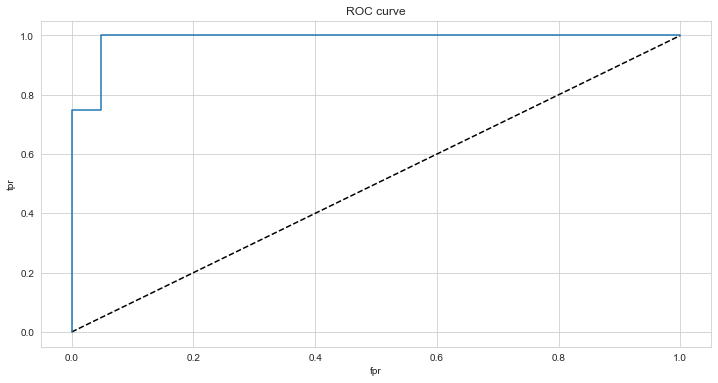

In [166]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [167]:
roc_auc_score(y_test, y_pred_proba)

0.988095238095238

## Saving Final Model and Scaler

In [168]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [169]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [170]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [171]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
8/8 [==============================] - 1s 43ms/step - loss: 0.6867 - accuracy: 0.6270 - val_loss: 0.6590 - val_accuracy: 0.6316
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.6426 - val_loss: 0.6340 - val_accuracy: 0.6842
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6257 - accuracy: 0.7266 - val_loss: 0.6045 - val_accuracy: 0.7719
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.7734 - val_loss: 0.5746 - val_accuracy: 0.7719
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.8086 - val_loss: 0.5453 - val_accuracy: 0.8070
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.8301 - val_loss: 0.5145 - val_accuracy: 0.8246
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.8438 - val_loss: 0.4837 - val_accuracy: 0.8596
Epoch 8/1000
8/8 [=

8/8 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9746 - val_loss: 0.0982 - val_accuracy: 0.9825
Epoch 60/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0780 - accuracy: 0.9766 - val_loss: 0.1182 - val_accuracy: 0.9474
Epoch 61/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9824 - val_loss: 0.1051 - val_accuracy: 0.9649
Epoch 62/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.9785 - val_loss: 0.1122 - val_accuracy: 0.9474
Epoch 63/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0741 - accuracy: 0.9785 - val_loss: 0.1016 - val_accuracy: 0.9649
Epoch 64/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0745 - accuracy: 0.9766 - val_loss: 0.1027 - val_accuracy: 0.9649
Epoch 65/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9785 - val_loss: 0.1130 - val_accuracy: 0.9474
Epoch 66/1000
8/8 [========

<AxesSubplot:>

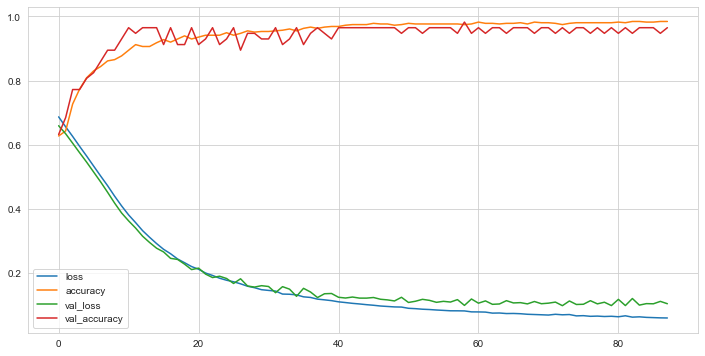

In [172]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [173]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [174]:
model.save('model_cancer.h5')

## Loading Model and Scaler

In [177]:
from tensorflow.keras.models import load_model

In [178]:
model_cancer = load_model('model_cancer.h5')
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [179]:
single_patient = df.drop('Cancer', axis = 1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,...,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


In [180]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[0.52103744, 0.0226581 , 0.68000973, 0.7920373 , 0.70313964,
        0.73111332, 0.68636364, 0.60551811, 0.35614702, 0.12046941,
        0.15929565, 0.35139844, 0.13568182, 0.30062512, 0.31164518,
        0.18304244, 0.62077552, 0.14152452, 0.61828432, 0.61929156,
        0.56861022, 0.91202749, 0.59846245, 0.41886396]])

In [181]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")

array([[0]])

In [182]:
df["Cancer"].iloc[0]

0

## Comparison with ML

### Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57

